In [1]:
#%reload 2
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import os
import sys

In [2]:
quandl.ApiConfig.api_key = "_epxy8PNMMrBFS5JL4_B"

In [3]:
GAS_STATIONS_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Tankstellen.csv')
GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')

In [33]:
start_date="2013-1-1"
end_date="2017-12-17"

In [5]:
gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=';', names=['id', 'Name', 'Company', 'Street', 'House_Number', 'Postalcode', 'City', 'Lat', 'Long'],index_col='id')

In [6]:
gas_station_id = 20

In [34]:
exchange = 'ODA/POILBRE_USD'
dataset = quandl.Dataset(exchange)
mydata = quandl.get(exchange, start_date=start_date, end_date=end_date)
exchange_data = mydata.resample('1T').mean().bfill()

In [9]:
max_correlation_index = 0
max_correlation = float('-inf')
for gas_station_row in gas_stations_df.iterrows():
    try:
        gas_station_data = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(gas_station_row[0])), names=['Timestamp', 'Price'],  index_col='Timestamp', parse_dates=['Timestamp'],sep=';')
        gas_station_data.resample('1T').mean().bfill()
        combined = exchange_data.merge(gas_station_data, left_index=True, right_index=True)
        assert not combined.empty 
        correlation = combined.corr()['Price'][0]
        if max_correlation < correlation:
            max_correlation = correlation
            max_correlation_index = gas_station_row[0]
    except FileNotFoundError:
        pass

In [10]:
max_correlation

1.0000000000000002

In [11]:
gas_stations_df.loc[max_correlation_index]

Name            Seevetal, Gluesinger Str. 44
Company                                   SB
Street                    Gluesinger Str. 44
House_Number                             NaN
Postalcode                             21217
City                                Seevetal
Lat                                  53.4182
Long                                 10.0205
Name: 1379, dtype: object

In [12]:
gas_station_data = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(max_correlation_index)), names=['Timestamp', 'Price'],  index_col='Timestamp', parse_dates=['Timestamp'],sep=';')

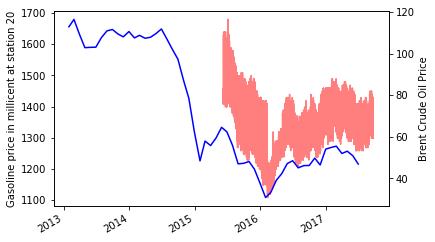

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(gas_station_data, 'r', alpha=0.5)
ax1.set_ylabel('Gasoline price in millicent at station ' + str(gas_station_id))

ax2 = ax1.twinx()
ax2.plot(mydata, 'b')
ax2.set_ylabel(dataset.name)

fig.autofmt_xdate()
plt.show()

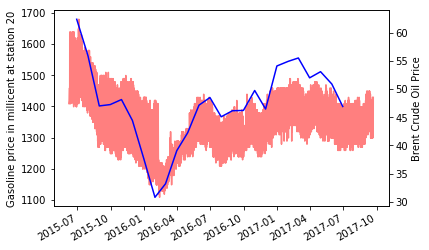

In [29]:
start_date='2015-06-06'
mydata = quandl.get(exchange, start_date=start_date, end_date=end_date)
fig, ax1 = plt.subplots()

ax1.plot(gas_station_data, 'r', alpha=0.5)
ax1.set_ylabel('Gasoline price in millicent at station ' + str(gas_station_id))

ax2 = ax1.twinx()
ax2.plot(mydata, 'b')
ax2.set_ylabel(dataset.name)

fig.autofmt_xdate()
plt.show()

In [35]:
combined = exchange_data.merge(gas_station_data, left_index=True, right_index=True)
combined

,Value,Price
2016-03-05 22:02:00,39.07,1219
2016-08-02 12:01:00,46.14,1249
